# Importing all necessary dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tflearn
import tensorflow as tf
from PIL import Image
%matplotlib inline
# For writing text files
import glob
import os     
import random 
# Reading images from a text file
from tflearn.data_utils import image_preloader
import math

In [2]:
IMAGE_FOLDER = '/home/sakshi/Desktop/ImageClassifier/train'
TRAIN_DATA = '/home/sakshi/Desktop/ImageClassifier/training_data.txt'
TEST_DATA = '/home/sakshi/Desktop/ImageClassifier/test_data.txt'
VALIDATION_DATA = '/home/sakshi/Desktop/ImageClassifier/validation_data.txt'
train_proportion=0.7
test_proportion=0.2
validation_proportion=0.1

# Read the image directories

In [3]:
filenames_image = os.listdir(IMAGE_FOLDER)
# Shuffling the data
random.shuffle(filenames_image)

# Importing the data

In [4]:
X_train, Y_train = image_preloader(TRAIN_DATA, image_shape=(45,45),mode='file', categorical_labels=True,normalize=True)
X_test, Y_test = image_preloader(TEST_DATA, image_shape=(45,45),mode='file', categorical_labels=True,normalize=True)
X_val, Y_val = image_preloader(VALIDATION_DATA, image_shape=(45,45),mode='file', categorical_labels=True,normalize=True)

# Description of data division

In [5]:
print ("Dataset")
print ("Number of training images {}".format(len(X_train)))
print ("Number of testing images {}".format(len(X_test)))
print ("Number of validation images {}".format(len(X_val)))
print ("Shape of an image {}" .format(X_train[1].shape))
print ("Shape of label:{} ,number of classes: {}".format(Y_train[1].shape,len(Y_train[1])))

Dataset
Number of training images 17500
Number of testing images 5000
Number of validation images 2500
Shape of an image (45, 45, 3)
Shape of label:(2,) ,number of classes: 2


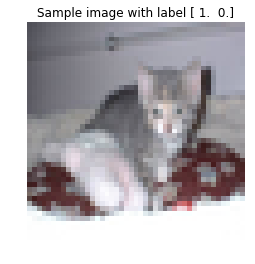

In [6]:
# Sample Image 
plt.imshow(X_train[1])
plt.axis('off')
plt.title('Sample image with label {}'.format(Y_train[1]))
plt.show()

# Declaring placeholders

In [7]:
x=tf.placeholder(tf.float32,shape=[None,45,45,3] , name='input_image') 
#input class
y_=tf.placeholder(tf.float32,shape=[None, 2] , name='input_class')

# CNN implementation

In [8]:
input_layer=x

# Convolutional layer 1 --convolution+RELU activation
conv_layer1=tflearn.layers.conv.conv_2d(input_layer, nb_filter=64, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')

# 2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


# Second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)
# Third convolutional layer
conv_layer3=tflearn.layers.conv.conv_2d(out_layer2, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer3=tflearn.layers.conv.max_pool_2d(conv_layer3, 2)

# Fully connected layer1
fcl= tflearn.layers.core.fully_connected(out_layer3, 4096, activation='relu' , name='FCL-1')
fcl_dropout_1 = tflearn.layers.core.dropout(fcl, 0.8)

# Fully connected layer2
fc2= tflearn.layers.core.fully_connected(fcl_dropout_1, 4096, activation='relu' , name='FCL-2')
fcl_dropout_2 = tflearn.layers.core.dropout(fc2, 0.8)

# Softmax layer output
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout_2, 2, activation='softmax', name='output')

# Loss function + optimizer + accuracy calculation

In [9]:
# Loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted+np.exp(-10)), reduction_indices=[1]))

# Optimizer -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Saving the model

In [10]:
# Session parameters
sess = tf.InteractiveSession()
# Initialising variables
init = tf.global_variables_initializer()
sess.run(init)
saver = tf.train.Saver()
save_path="/home/Desktop/ImageClassifier"

# Declaraing epochs

Epochs and batch_size are intentionally kept low, as per my system configuration

In [11]:
epoch=3
batch_size=8
no_itr_per_epoch=len(X_train)//batch_size 

In [12]:
no_itr_per_epoch

# number of test samples
n_test=len(X_test) 

# number of validation samples
n_val=len(X_val)  

In [15]:
# Now iterate over our dataset n_epoch times
for iteration in range(epoch):
    print("Iteration no: {} ".format(iteration))
    
    previous_batch=0
    # Do our mini batches:
    for i in range(no_itr_per_epoch):
        current_batch=previous_batch+batch_size
        x_input=X_train[previous_batch:current_batch]
        x_images=np.reshape(x_input,[batch_size,45,45,3])
        
        y_input=Y_train[previous_batch:current_batch]
        y_label=np.reshape(y_input,[batch_size,2])
        previous_batch=previous_batch+batch_size
        
        sess.run(train_step, feed_dict={x: x_images,y_: y_label})  

Iteration no: 0 
Iteration no: 1 
Iteration no: 2 


# Accuracy on test dataset

In [28]:
x_test_images=np.reshape(X_test[0:2500],[2500,45,45,3])
y_test_labels=np.reshape(Y_test[0:2500],[2500,2])
Accuracy_test=sess.run(accuracy,
                           feed_dict={
                        x: x_test_images ,
                        y_: y_test_labels
                      })
Accuracy_test=round(Accuracy_test*100,2)
print "Accuracy in the test dataset: {} %" .format(Accuracy_test)

Accuracy in the test dataset: 72.0 %


# Accuracy on validation dataset

In [25]:
x_val_images=np.reshape(X_val[0:n_val],[n_val,45,45,3])
y_val_labels=np.reshape(Y_val[0:n_val],[n_val,2])
Accuracy_val=sess.run(accuracy,
                           feed_dict={
                        x: x_val_images ,
                        y_: y_val_labels
                      })    
Accuracy_val=round(Accuracy_val*100,2)
print("Accuracy :: Validation_set {} % " .format(Accuracy_val)) 

Accuracy :: Validation_set 78.0 % 


# Preprocessing image for model

In [29]:
def process_img(img):
        img=img.resize((45, 45), Image.ANTIALIAS) #resize the image
        img = np.array(img)
        img=img/np.max(img).astype(float) 
        img=np.reshape(img, [1,45,45,3])
        return img

# Testing for random new image

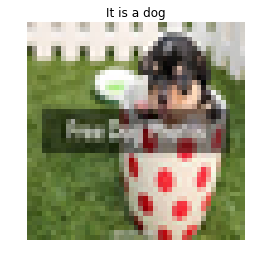

In [41]:
test_image=Image.open('/home/sakshi/Desktop/images (1).jpg')
test_image= process_img(test_image)
predicted_array= sess.run(y_predicted, feed_dict={x: test_image})
predicted_class= np.argmax(predicted_array)
plt.imshow(test_image[0,:,:,:])
plt.axis('off')
if predicted_class==0:
    plt.title("It is a cat")
else :
    plt.title("It is a dog")
plt.show()